### S05 T01: Tasca mètodes de mostreig

## **Exercici 1**

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

For this exercise we will look at a dataset on the athletes that took part on modern Olympic Games, including all the Games from Athens 1896 to Rio 2016, including Summer and Winter Games. This dataset is taken from the page: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

<div>
<img src="Olympics.png" width="220"/>
</div>

In [37]:
import pandas as pd
import random
import math 
import numpy as np
from IPython.display import display_html 
pd.options.mode.chained_assignment = None  # default='warn'

In [38]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We have some repeated athletes in teh dataframe but we will not delete these duplicates because some athletes compete in different categories and even in different Games, so it's normal that they can appear more than once.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Foe the purpose of this exercise, first we will delete all rows that have null values in columns: 'Age', 'Height', 'Weight'. Null values in the column 'Medal' means no medal won, so we'll keep this info. 

In [40]:
df = df.dropna(subset = ['Age', 'Height', 'Weight'])

In [41]:
df.shape

(206165, 15)

In [42]:
df_describe = df[['Age', 'Height', 'Weight']].describe().round(2)
df_describe

,Age,Height,Weight
count,206165.00,206165.00,206165.00
mean,25.06,175.37,70.69
std,5.48,10.55,14.34
min,11.00,127.00,25.00
25%,21.00,168.00,60.00
50%,24.00,175.00,70.00
75%,28.00,183.00,79.00
max,71.00,226.00,214.00


We can see a summary of the statistics for the numerical columns of this dataset: Age, Height and Weight. The dataset contains 206165  rows and 15 columns. 

### Random sampling

First, we will generate a **random sample of 30000 rows.**


In [43]:
# we use random state if we want our results to be reproducible 
random1 = df.sample(n=30000, random_state =42)
random1.shape

(30000, 15)

Now we have 30000 rows, let´s compare summary statistics of the numerical columns of this sampled dataframe with the whole dataframe:

In [44]:
random1_describe = random1[['Age', 'Height', 'Weight']].describe().round(2)

We´ll create a function to be able to display two dataframes side by side so we can compare better:

In [45]:
def side_by_side_df(df1, df2, title1, title2):

    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption(title1)
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption(title2)
    space = "\xa0" * 10
    display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)

In [46]:
title1 = 'df_describe'
title2 = 'random1_describe'
side_by_side_df(df_describe, random1_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,30000.000000,30000.000000,30000.000000


Overall we can see that the summary of statistics does not vary that much if we take a sample of the original dataset. Some min and max values may change a little but measures like, mean, standard deviation and quartiles are quite similar.

We can also do a random sampling **choosing the percentage of the data we want to sample**, for instance, if we want to sample the 10% of our data we can do:

In [47]:
random2 = df.sample(frac = 0.1, random_state = 42)
random2.shape

(20616, 15)

We now have 20616 rows in our dataframe (10% of the original). We can compare its summary statistics with the original dataframe too:

In [48]:
random2_describe = random2[['Age', 'Height', 'Weight']].describe()

title1 = 'df_describe'
title2 = 'random2_describe'
side_by_side_df(df_describe, random2_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,20616.000000,20616.000000,20616.000000


As before, we can see the summary statistics doesn't vary that much after doing the sampling.

### Systematic random sampling

In this case, we´ll use a random starting point and a fixed periodic interval.

First, we need to decide which size we want the sample to be. Let´s say we want a **sample of aproximately 5000 rows**, we can do:


In [49]:
final_rows = 5000
interval = math.floor(len(df)/final_rows)

# we randomnly assign a starting point between 1 and our interval: 
random_number = random.randint(1, interval)

# now we can define our funcion: 
def systematic_random_samplig(df): 
    rows = np.arange(random_number, len(df), interval)
    sampled_df = df.iloc[rows]
    return sampled_df

systematic_sampling_df = systematic_random_samplig(df)
systematic_sampling_df.shape

(5028, 15)

We have now 5029 rows in our sample. Again we will compare the summary statistics with the original dataframe:

In [50]:
systematic_describe = systematic_sampling_df[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'systematic_describe'
side_by_side_df(df_describe, systematic_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,5028.000000,5028.000000,5028.000000


Even though the sampling now is significantly smaller than the previous samples (only 5029 rows), we can see that the mean, standard deviation and even the quartiles remain quite similar.

## **Exercici 2**

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

### Stratified Sampling

Stratified sampling means dividing first the data in groups and then sampling randomnly inside those groups.

For stratified sampling we can do either:

+ **Disproportionate sampling:** the sample size of each group is not proportional to the population size of the group.
+ **Proportionate sampling:** the sample size of each groups is proportional to the population size of the group.

Now let´s see an example of **disproportionate sampling** in which we´ll divide the athletes by **male or female** and generate equally random samples for each group:

In [51]:
# we´ll define the size of the sample, we want to have 500 males and 500 females: 
strat1 = df.groupby('Sex', group_keys = False).apply(lambda x: x.sample(500, random_state = 42))
strat1.shape

(1000, 15)

In [52]:
# we check if the sample is 500 male and 500 female: 
strat1.Sex.value_counts()

F    500
M    500
Name: Sex, dtype: int64

Now we´ll do a **Stratified Proportionate Sample**. First, we will look at percentages between male and female athletes in the original dataset:

In [53]:
gender = df.Sex.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
gender.reset_index()

,index,Sex
0,M,67.64%
1,F,32.36%


Now we will do the stratified proportionate sample, in this case we want the **sample size to be the 15%** of the original:

In [54]:
strat2 = df.groupby('Sex', group_keys= False).apply(lambda x: x.sample(frac = 0.15, random_state =42))
strat2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
168450,84660,Liliana Nstase (-Alexandru),F,29.0,170.0,65.0,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 100 metres Hurdles,NaN
128186,64554,Nataliya Kubrina,F,33.0,172.0,60.0,Kazakhstan,KAZ,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,NaN
207518,104116,Hiroko Sadakane,F,23.0,160.0,52.0,Japan,JPN,2010 Winter,2010,Winter,Vancouver,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",NaN
172749,86793,Katja Nolten,F,18.0,175.0,66.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Singles,NaN
112826,57156,Yevgeniya Olegovna Kanayeva,F,18.0,168.0,42.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,Gold


In [55]:
strat2.shape

(30925, 15)

Now we have 30925 rows (15% of the original). Let´s check if the percentages of male and female athletes resembles the original dataframe:

In [56]:
strat_gender = strat2.Sex.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
strat_gender.reset_index()

,index,Sex
0,M,67.64%
1,F,32.36%


We can see that the proportion of male and female is the same as before the sampling.

### SMOTE

SMOTE is a technique that oversamples a minority class in an imbalanced dataset. In our case, we can look at the **season of the Games: athletes from Winter Games or athletes from Summer Gammes.**

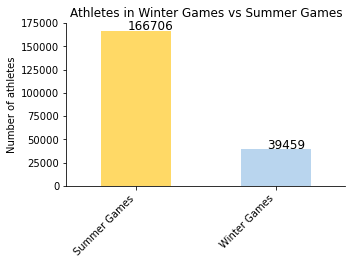

In [57]:
ax = df.Season.value_counts().plot(kind = 'bar', figsize = (5, 3), color = ['#ffd966','#b9d5ee'])
ax.set_title('Athletes in Winter Games vs Summer Games', fontsize = 12)
ax.set_ylabel('Number of athletes', fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabels = ['Summer Games', 'Winter Games']
ax.set_xticklabels(xlabels, rotation=45, ha='right')
for i in ax.patches: 
    ax.text(i.get_x()+0.19, i.get_height() + 700, str(round(i.get_height(), 2 )), fontsize = 12)

We see the dataset is pretty imbalanced in this case. Before doing SMOTE, we have to get rid of categorical data. We will delete some columns that we are not going to use and also we will transform some categorical into numerical data.

In [58]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [59]:
# we create a new dataframe with only the columns we want: 
columns = ['Sex','Age', 'Height', 'Weight','Year', 'Season', 'Medal']
df2 = df[columns]

In [60]:
df2.head(3)

,Sex,Age,Height,Weight,Year,Season,Medal
0,M,24.0,180.0,80.0,1992,Summer,NaN
1,M,23.0,170.0,60.0,2012,Summer,NaN
4,F,21.0,185.0,82.0,1988,Winter,NaN


In [61]:
# change categorical columns Sex, Season and Medal to integer: 

# mapping sex
df2['Sex'] = df2['Sex'].map({'M': 0, 'F': 1}).astype(int)
    
# mapping Season
df2['Season'] = df2['Season'].map({'Winter' : 0, 'Summer': 1}).astype(int)
    
# mapping Medal
medal_map = {np.nan: 0, 'Bronze': 3, 'Silver': 2, 'Gold': 1}
df2['Medal'] = df2['Medal'].map(medal_map).astype(int)

In [62]:
df2.head()

,Sex,Age,Height,Weight,Year,Season,Medal
0,0,24.0,180.0,80.0,1992,1,0
1,0,23.0,170.0,60.0,2012,1,0
4,1,21.0,185.0,82.0,1988,0,0
5,1,21.0,185.0,82.0,1988,0,0
6,1,25.0,185.0,82.0,1992,0,0


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     206165 non-null  int32  
 1   Age     206165 non-null  float64
 2   Height  206165 non-null  float64
 3   Weight  206165 non-null  float64
 4   Year    206165 non-null  int64  
 5   Season  206165 non-null  int32  
 6   Medal   206165 non-null  int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 10.2 MB


Now we can do SMOTE for oversampling the minority class, in our case the Winter Games. First we import the library:

In [64]:
from imblearn.over_sampling import SMOTE 

In [65]:
sm = SMOTE(random_state = 42)

X_sm, y_sm = sm.fit_resample(df2, df2['Season'])
X_sm.head()

,Sex,Age,Height,Weight,Year,Season,Medal
0,0,24.0,180.0,80.0,1992,1,0
1,0,23.0,170.0,60.0,2012,1,0
2,1,21.0,185.0,82.0,1988,0,0
3,1,21.0,185.0,82.0,1988,0,0
4,1,25.0,185.0,82.0,1992,0,0


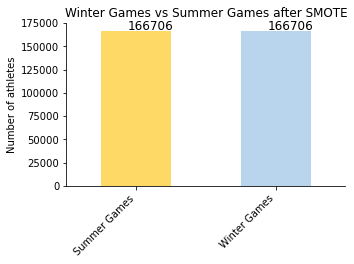

In [66]:
# again we´ll look at the graph to compare Season: 
ax = X_sm.Season.value_counts().plot(kind = 'bar', figsize = (5, 3), color = ['#ffd966','#b9d5ee'])
ax.set_title('Winter Games vs Summer Games after SMOTE', fontsize = 12)
ax.set_ylabel('Number of athletes', fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabels = ['Summer Games', 'Winter Games']
ax.set_xticklabels(xlabels, rotation=45, ha='right')
for i in ax.patches: 
    ax.text(i.get_x()+0.19, i.get_height() + 700, str(round(i.get_height(), 2 )), fontsize = 12)

We can see it worked!! Let´s check if the summary statistics resemble the ones in the orifginal dataframe:

In [67]:
X_sm_describe = X_sm[['Age', 'Height', 'Weight']].describe()

title1 = 'df_describe'
title2 = 'X_sm_describe'
side_by_side_df(df_describe, X_sm_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,333412.000000,333412.000000,333412.000000


Despite that we have oversampled part of our data, the summary statistics are quite similar in both cases. We can check if the proportion of males/females that we calculated earlier is kept in this case:

In [68]:
gender_sm = X_sm.Sex.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
gender_sm.reset_index()

,index,Sex
0,0,68.87%
1,1,31.13%


It´s not the same proportion as before, but it´s very similar, only 1 point different (before it was 67.64% for Male and 32.36% for female)

## **Exercici 3**

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

Reservoir is an algorithm that given a dataframe of unknown lenght ensures that we can choose k elements such that each element has an equal probability of getting selected.It can be mathematically proved that in the sample **each element has the same probability of getting selected from the stream.**

This algorithm is explained in: https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

In [69]:
# we use the reservoir algorithm: 
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
        
stream = generator(len(df))
reservoir = []
k= 200 # we want our sample to have a size of 200

for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
print(reservoir)

[164016, 114399, 89051, 136467, 40218, 84355, 3314, 109343, 68491, 152251, 6428, 64112, 38623, 185537, 18603, 89645, 11917, 77326, 174045, 125103, 161226, 206006, 11292, 173737, 118858, 49999, 90674, 122079, 122179, 191189, 80666, 138719, 58930, 198453, 45862, 112331, 19924, 18264, 145528, 59755, 63421, 195373, 77907, 66752, 102286, 203795, 58649, 100303, 183390, 202307, 62063, 144206, 1462, 47992, 142126, 164539, 16393, 157130, 13277, 21636, 158927, 152332, 132022, 1124, 3589, 155998, 65485, 203361, 36884, 145803, 134163, 157794, 41373, 10048, 117761, 52156, 111084, 186679, 85397, 10306, 94123, 6674, 70634, 16556, 93839, 89311, 175492, 189373, 191541, 101346, 147886, 4240, 125208, 38239, 129433, 36315, 26189, 127773, 201880, 3817, 73907, 148973, 187427, 92460, 4937, 129940, 115419, 15007, 44343, 97700, 4858, 100304, 77893, 93454, 73561, 20999, 148298, 133498, 47387, 171783, 152790, 90354, 116065, 189408, 51797, 154081, 77441, 133141, 179268, 200699, 160274, 118701, 65505, 184987, 1463

In [70]:
# we have a list of 200 random indexes, now we can get a reservoir sample of these 200 rows: 
reservoir_df = df.iloc[reservoir]
reservoir_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
216321,108583,Kseniya Andreyevna Semyonova,F,15.0,138.0,35.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
151262,75917,Thor Kristian Martinsen,M,22.0,170.0,80.0,Norway,NOR,1968 Winter,1968,Winter,Grenoble,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
118442,59916,Kim Gyeong-Hun,M,25.0,196.0,84.0,South Korea,KOR,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Men's Heavyweight,Gold


In [71]:
reservoir_df.shape

(200, 15)

As we did above, we can compare the summary statistics with the original dataframe:

In [72]:
reservoir_df_describe = reservoir_df[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'reservoir_df_describe'
side_by_side_df(df_describe, reservoir_df_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,200.000000,200.000000,200.000000


Here we can see a little variation from the original dataframe, specially in the min and max values, but we have to take into account that this is the smallest sample we've created so far (it only contains 200 rows).